# Tips Data Set for EDA

In [9]:
import pandas as pd
import pandas as MKMKMKMK
import pandas as MKMKMKMK
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
# pd.set_option('max_columns',200) - Used if columns counts are more and not visisble( i,e - ...)


In [10]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [11]:
df.shape # Shape of the data set 

(244, 7)

In [12]:
df.head(10) # First 10 rows to list

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [13]:
df.columns # To list all the columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [14]:
df.dtypes # Data Types

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [15]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Data Preparation - Need to do some sort of cleaning before we go into analysis

In [17]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [18]:
# To change the column first lettter to capital for the entire data set
df.columns=[col.capitalize() for col in df.columns]
df

,Total_bill,Tip,Sex,Smoker,Day,Time,Size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [19]:
#To Identify the missing values in a data set

df.isna().sum()

Total_bill    0
Tip           0
Sex           0
Smoker        0
Day           0
Time          0
Size          0
dtype: int64

In [20]:
df[df['Total_bill'] == True].loc[df[df['Total_bill'] == True].duplicated(keep=False)]

,Total_bill,Tip,Sex,Smoker,Day,Time,Size


In [21]:
df.duplicated() #- In general to find the duplicated values


0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool

In [22]:
df.loc[df.duplicated()]

,Total_bill,Tip,Sex,Smoker,Day,Time,Size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [23]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,Total_bill,Tip,Sex,Smoker,Day,Time,Size
198,13.0,2.0,Female,Yes,Thur,Lunch,2
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [24]:
duplicates = df[df.duplicated(keep='last')]
duplicates

,Total_bill,Tip,Sex,Smoker,Day,Time,Size
198,13.0,2.0,Female,Yes,Thur,Lunch,2


In [25]:
df.duplicated(subset=['Total_bill','Tip','Size']).sum() # To see how many rows are duplicated

2

In [26]:
# To check the rows which are not duplicated
df = df.loc[~df.duplicated(subset=['Total_bill','Tip','Size'])].reset_index(drop=True).copy()
df

# perform reset index to sequece the data

,Total_bill,Tip,Sex,Smoker,Day,Time,Size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
237,29.03,5.92,Male,No,Sat,Dinner,3
238,27.18,2.00,Female,Yes,Sat,Dinner,2
239,22.67,2.00,Male,Yes,Sat,Dinner,2
240,17.82,1.75,Male,No,Sat,Dinner,2


In [27]:
df.shape

(242, 7)

In [56]:
df['Total_bill'].value_counts()

Total_bill
13.42    3
17.92    2
7.25     2
21.01    2
20.69    2
        ..
18.28    1
24.71    1
21.16    1
28.97    1
18.78    1
Name: count, Length: 229, dtype: int64

Text(0, 0.5, 'Total Bill')

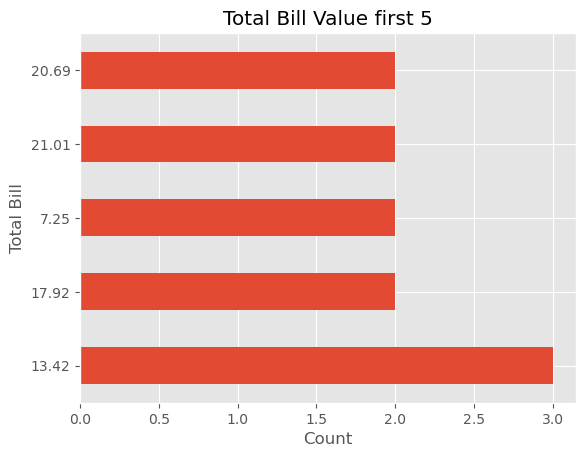

In [60]:
ax=df['Total_bill'].value_counts().head(5).plot(kind='barh', title = 'Total Bill Value first 5')
ax.set_xlabel('Count')
ax.set_ylabel('Total Bill')

In [62]:
df

,Total_bill,Tip,Sex,Smoker,Day,Time,Size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
237,29.03,5.92,Male,No,Sat,Dinner,3
238,27.18,2.00,Female,Yes,Sat,Dinner,2
239,22.67,2.00,Male,Yes,Sat,Dinner,2
240,17.82,1.75,Male,No,Sat,Dinner,2


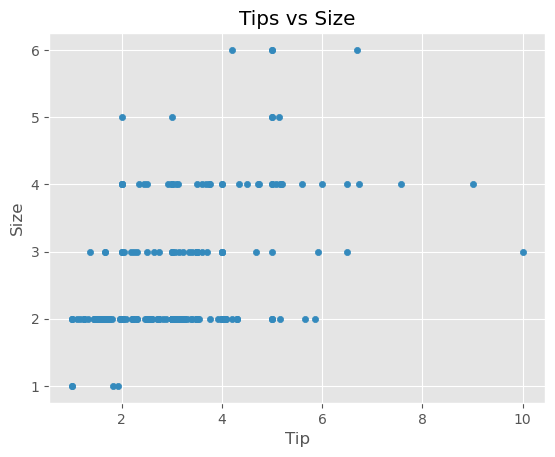

In [68]:
# matplot lib is used here
df.plot(kind='scatter',x='Tip',y='Size', title='Tips vs Size')
plt.show()

<Axes: xlabel='Tip', ylabel='Size'>

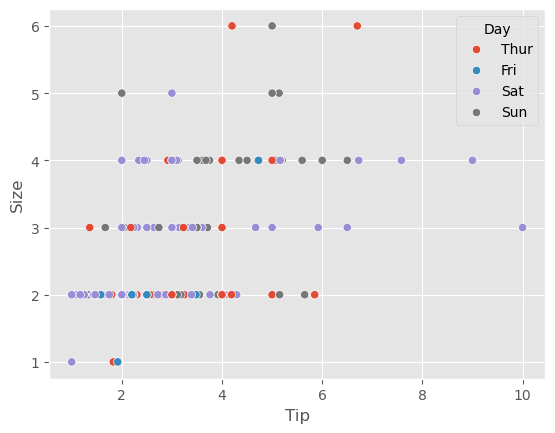

In [72]:
# using seaborn

sns.scatterplot(x='Tip', y='Size', hue='Day', data=df)

In [74]:
df.head()

,Total_bill,Tip,Sex,Smoker,Day,Time,Size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


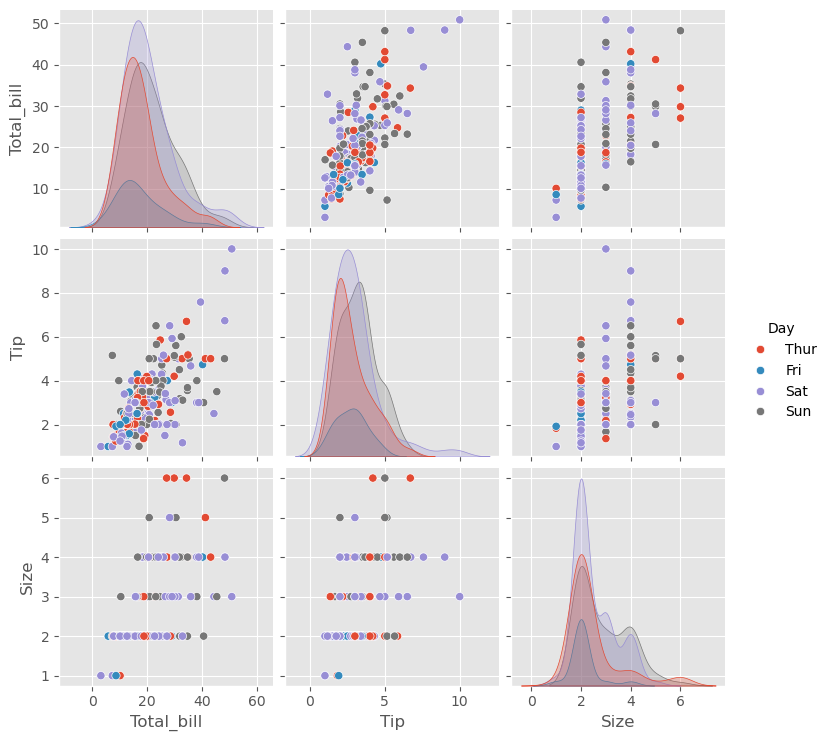

In [78]:
sns.pairplot(df,vars=['Total_bill','Tip','Size'], hue='Day')
plt.show()